Find a data set whose features/independent variables are all numerical and whose target/dependent variables is categorical (only labels - no numbers).

You have to perform the following tasks on your selected data set:

* preliminary data analysis (use describe and count to analyze basic statistics on your data set).  Briefly report your findings.
* use visualization (especially scatter plot and bar graphs) to explore your data set further. Report your findings.
* Build decision tree models. Build two decision tree models on your data set:
    1. An unrestricted model.
    2. A model whose performance is only ~10% worse than the unrestricted model.
* Compare your two models and comment on the readability of the tree.  Also, provide a brief interpretation of the second model.  Does it provide any deeper insights or patterns?

In [ ]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys

    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/URI/Fall 2021/CSC 310/Notes/"
    user_home = "/content/drive/My Drive/"

    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [ ]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:
penguin_df = pandas.read_csv(notes_home+'assets/penguins.csv', index_col=0)
penguin_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,Adelie,39.1,18.7,181,3750
2,Adelie,39.5,17.4,186,3800
3,Adelie,40.3,18.0,195,3250
5,Adelie,36.7,19.3,193,3450
6,Adelie,39.3,20.6,190,3650
...,...,...,...,...,...
340,Chinstrap,55.8,19.8,207,4000
341,Chinstrap,43.5,18.1,202,3400
342,Chinstrap,49.6,18.2,193,3775
343,Chinstrap,50.8,19.0,210,4100


In [ ]:
penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguin_df.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [ ]:
penguin_df['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

<br>This data set lists a total of 342 penguins, which includes <i>three</i> different species and shows each of their physical stats such as: bill length in mm, the depth of their bill in mm, their flipper length in mm, and their body mass in g.<br><br>
Out of this data set, the species <u>Adelie</u> is one that appears most frequently out of the three, totaling to about 44% of the penguins in this data set.  
<br>

Text(0, 0.5, 'Number of Penguins')

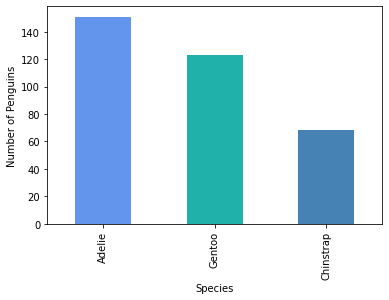

In [ ]:
penguin_df.loc[:,'species'].value_counts().plot.bar(color=['cornflowerblue','lightseagreen','steelblue'])
plt.xlabel('Species')
plt.ylabel('Number of Penguins')

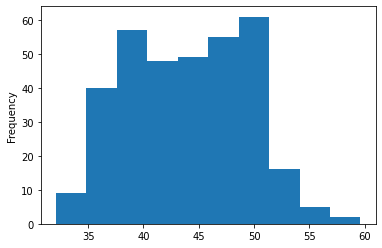

In [ ]:
penguin_df.loc[:,'bill_length_mm'].plot.hist()

The Histogram above shows a higher frequency of bill lengths at the lengths between around 40 and 50.

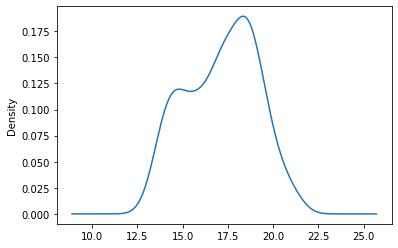

In [ ]:
penguin_df.loc[:,'bill_depth_mm'].plot.kde()

The Density Plot above shows unimodal at its highest point of around 18 or 19 mm.  

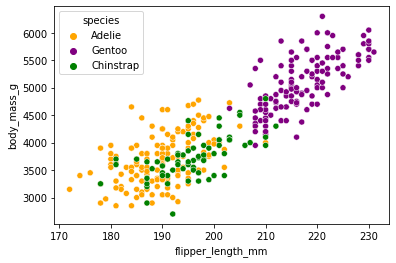

In [ ]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=penguin_df, palette=['orange','purple', 'green'])

In the scatter plot above, you can determine that there are <i>two</i> main clusters. The first cluster on the left groups together mostly the <i>Adelie</i> and <i>Chinstrap</i> species and the other cluster on the right consists of mostly the <i>Gentoo</i> species.<br><br>
You can infer that the Gentoo species has a <u>longer</u> flipper length in mm as well as a <u>higher</u> body mass in g compared to the other two species, Adelie and Chinstrap.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


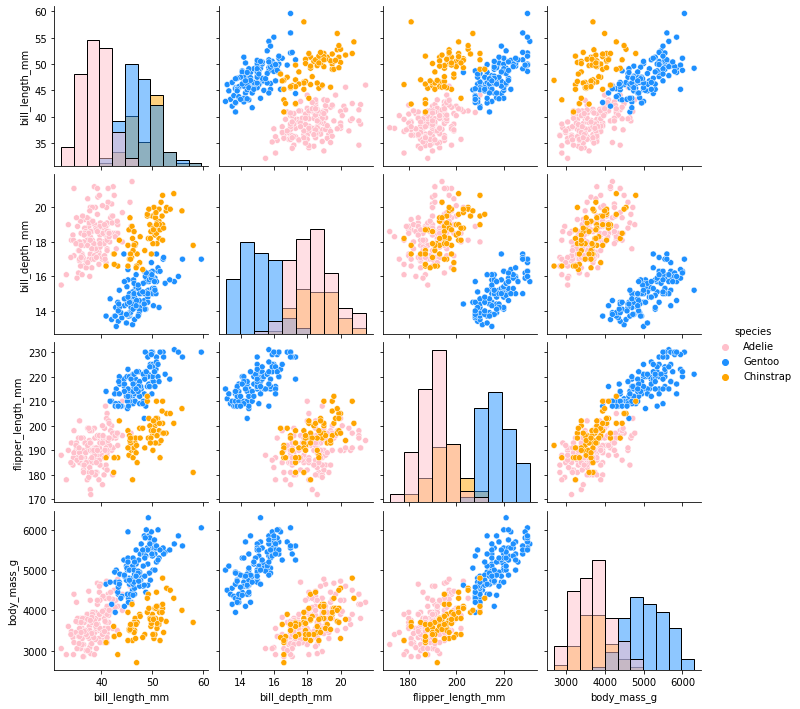

In [ ]:
sns.pairplot(penguin_df, hue='species', size=2.5, palette=['pink', 'dodgerblue', 'orange'], diag_kind="hist")

<br>Based on the data displayed in this Pair Plot, when it comes to the bill depth, flipper length, and body mass, the two species <u>Adelie</u> and <u>Chinstrap</u> appear to be close in numbers, having a closer similarity together than with the third species Gentoo. <br><br>
You can also see that the main notable difference when the Gentoo species is anywhere similar to one of the other species is when it comes to the bill length. The <u>Gentoo</u> and <u>Chinstrap</u> species appear to overlap, having closer data in numbers when it comes to the length of their bills. <br>

In [ ]:
features_df = penguin_df.drop(['species'],axis=1)
features_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,39.1,18.7,181,3750
2,39.5,17.4,186,3800
3,40.3,18.0,195,3250
5,36.7,19.3,193,3450
6,39.3,20.6,190,3650


In [ ]:
target_df = pandas.DataFrame(penguin_df['species'])
target_df.head()

,species
1,Adelie
2,Adelie
3,Adelie
5,Adelie
6,Adelie


In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(features_df,target_df)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_print(dtree,features_df)

if flipper_length_mm =< 206.5: 
  |then if bill_length_mm =< 43.35000038146973: 
  |  |then Adelie
  |  |else Chinstrap
  |else if bill_depth_mm =< 17.649999618530273: 
  |  |then Gentoo
  |  |else Chinstrap
<---->
Tree Depth:  2


In [ ]:
predict_array = dtree.predict(features_df)
predicted_labels = pandas.DataFrame(predict_array)
predicted_labels.columns = ['species']
predicted_labels.head()

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie


In [ ]:
target_df.head()

,species
1,Adelie
2,Adelie
3,Adelie
5,Adelie
6,Adelie


In [ ]:
predicted_labels.equals(target_df)

False

In [ ]:
from sklearn.metrics import accuracy_score

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.9649122807017544


The first Decision Tree above shows False when trying to see if the predicted labels equal the labels in target_df, so the model shows it is <i>not</i> 100% correct.<br><br>
Adding in a max_depth parameter on the Decision Tree and setting it to 2 to reduce the complexity also reduced the model accuracy from 1.0 to 0.9649122807017544. Not growing the full tree only drops the accuracy by about 4%. The original depth is 7 (shown below).

In [ ]:
target_df['species'].replace(["Adelie", "Chinstrap", "Gentoo"], [1,2,3], inplace=True)

In [ ]:
import numpy as np
target_df= target_df.to_numpy()
target_df= target_df.flatten()
target_df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy')
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_print(dtree2,features_df)

if flipper_length_mm =< 206.5: 
  |then if bill_length_mm =< 43.35000038146973: 
  |  |then if bill_length_mm =< 42.35000038146973: 
  |  |  |then if bill_depth_mm =< 16.65000057220459: 
  |  |  |  |then if bill_length_mm =< 39.5: 
  |  |  |  |  |then 1
  |  |  |  |  |else 2
  |  |  |  |else 1
  |  |  |else if bill_depth_mm =< 17.449999809265137: 
  |  |  |  |then 2
  |  |  |  |else 1
  |  |else if body_mass_g =< 4125.0: 
  |  |  |then 2
  |  |  |else if bill_length_mm =< 48.80000114440918: 
  |  |  |  |then if bill_depth_mm =< 16.649999618530273: 
  |  |  |  |  |then 3
  |  |  |  |  |else if bill_depth_mm =< 19.300000190734863: 
  |  |  |  |  |  |then if flipper_length_mm =< 196.0: 
  |  |  |  |  |  |  |then 2
  |  |  |  |  |  |  |else 1
  |  |  |  |  |  |else 1
  |  |  |  |else 2
  |else if bill_depth_mm =< 17.649999618530273: 
  |  |then 3
  |  |else if bill_length_mm =< 46.54999923706055: 
  |  |  |then 1
  |  |  |else 2
<------------------->
Tree Depth:  7


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


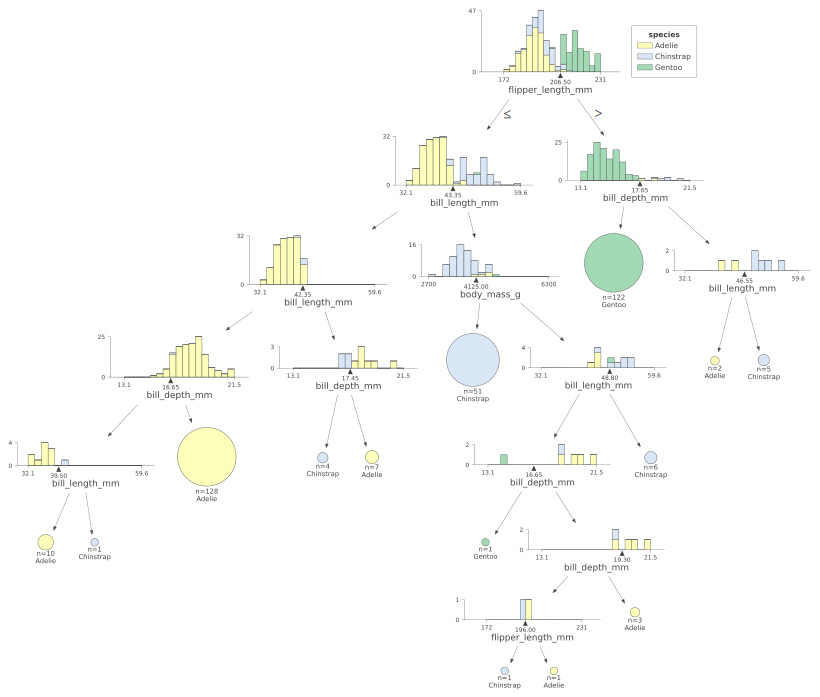

In [ ]:
viz = dtreeviz(dtree2,
               features_df,
               target_df,
               target_name='species',
               feature_names=features_df.columns,
               class_names=["Adelie", "Chinstrap", "Gentoo"]
              )
viz

In [ ]:
predict_array2 = dtree2.predict(features_df)
predicted_labels2 = pandas.DataFrame(predict_array2)
predicted_labels2.columns = ['species']

In [ ]:
print("Our model accuracy is now: {}".format(accuracy_score(target_df, predicted_labels2)))

Our model accuracy is now: 1.0


<br>The second Decision Tree includes the complete depth of the tree, allowing for a 100% in accuracy. Although the difference in accuracy is not huge, it is still reduced by minimizing the first Decision Tree. <br><br>
The second (full) Decision Tree includes a visualization that provides more details in comparison for each of the penguin species for the length of flipper, bill length and depth, and body mass. The readability is harder to determine based on the simple decision tree listed above since there are more branches, but you are able to find out more data that may be needed.<br>